# WeatherPy

## Analysis

- Humidity is high close to the equator.
- Cloudiness is predominant at higher latitudes.
- Wind speed also increases at higher latitudes.

In [2]:
# Import dependencies
import openweathermapy as ow
from citipy import citipy
import pandas as pd
import numpy as np
import requests
import json
from random import uniform
import matplotlib.pyplot as plt

# import api_key from config file
from config import api_key

## Generate Cities List

In [3]:
# Generate 1500 random geo coordinates to stay above 500 city min, assuming some cities won't have any weather info 
# and there will be duplicates
coordinates = []

for i in range(1500):
    value = uniform(-90,90), uniform(-180, 180)
    coordinates.append(value)

In [4]:
# Create list of cities using random coordinates
cities = []
for coordinate_pair in coordinates:
    lat, lon = coordinate_pair
    cities.append(citipy.nearest_city(lat, lon))

In [5]:
city_names = []
for city in cities:
    name = city.city_name
    city_names.append(name)

In [6]:
# Create a unique list of cities
city_names_unique = set(city_names)
len(city_names_unique)

608

In [7]:
city_names_final = []
for value in city_names_unique:
    name = [value]
    city_names_final.append(name)

In [8]:
# Create a dataframe of city names

cities_list = pd.DataFrame(city_names_final)
cities_list["City"] = cities_list
final_cities_list = cities_list[["City"]]

In [9]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [10]:
# Create blank columns for necessary fields for final DataFrame
final_cities_list["Cloudiness"] = ""
final_cities_list["Country"] = ""
final_cities_list["Date"] = ""
final_cities_list["Humidity"] = ""
final_cities_list["Lat"] = ""
final_cities_list["Lng"] = ""
final_cities_list["Max Temp"] = ""
final_cities_list["Wind Speed"] = ""

In [11]:
# set up params
params = {}

# Counter
row_count = 0

## Perform API Calls

In [12]:
# Loop through and grab the weather info
for index, row in final_cities_list.iterrows():
    
    # update params with city each loop
    params = row['City']
    
    # Print log to ensure loop is working correctly
    print(f"Now retrieving city #{row_count} {params}")
    row_count += 1
    
    # Run requests to grab the JSON at the requested URL
    city = requests.get(query_url + params)
    print(city.url)
    
    city = city.json()
    
    # Append the weather info to the appropriate columns
    # Use try / except to skip any cities with errors
    try:
        
        city_lat = city['coord']['lat']
        city_lng = city['coord']['lon']
        city_cloud = city['clouds']['all']
        city_country = city['sys']['country']
        city_date = city['dt']
        city_humidity = city['main']['humidity']
        city_max_temp = city['main']['temp_max']
        city_wind = city['wind']['speed']

        final_cities_list.loc[index, "Lat"] = city_lat
        final_cities_list.loc[index, "Lng"] = city_lng
        final_cities_list.loc[index, "Cloudiness"] = city_cloud
        final_cities_list.loc[index, "Country"] = city_country
        final_cities_list.loc[index, "Date"] = city_date
        final_cities_list.loc[index, "Humidity"] = city_humidity
        final_cities_list.loc[index, "Max Temp"] = city_max_temp
        final_cities_list.loc[index, "Wind Speed"] = city_wind
        
    except (KeyError, IndexError):
        print("Error with weather data. Skipping")
        
        # drops rows with errors
        final_cities_list.drop(labels=index, inplace=True)

Now retrieving city #0 atbasar
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=atbasar
Now retrieving city #1 suoyarvi
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=suoyarvi
Now retrieving city #2 aykhal
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=aykhal
Now retrieving city #3 kupang
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=kupang
Now retrieving city #4 palana
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=palana
Now retrieving city #5 marquette
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=marquette
Now retrieving city #6 pevek
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=pevek
Now retrie

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=delta%20del%20tigre
Now retrieving city #56 samusu
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=samusu
Error with weather data. Skipping
Now retrieving city #57 turukhansk
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=turukhansk
Now retrieving city #58 kiunga
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=kiunga
Now retrieving city #59 palmer
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=palmer
Now retrieving city #60 minbu
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=minbu
Now retrieving city #61 barra do garcas
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=nacala
Now retrieving city #111 tasiilaq
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=tasiilaq
Now retrieving city #112 bambous virieux
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=bambous%20virieux
Now retrieving city #113 fortuna
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=fortuna
Now retrieving city #114 hami
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=hami
Now retrieving city #115 goteborg
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=goteborg
Error with weather data. Skipping
Now retrieving city #116 yamada
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&un

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=curillo
Now retrieving city #166 tilichiki
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=tilichiki
Now retrieving city #167 torbay
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=torbay
Now retrieving city #168 castro
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=castro
Now retrieving city #169 port elizabeth
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=port%20elizabeth
Now retrieving city #170 hillsboro
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=hillsboro
Now retrieving city #171 noshiro
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=noshiro
Now r

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=kirakira
Now retrieving city #221 tahta
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=tahta
Error with weather data. Skipping
Now retrieving city #222 bathsheba
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=bathsheba
Now retrieving city #223 cape town
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=cape%20town
Now retrieving city #224 torres
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=torres
Now retrieving city #225 novyy svit
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=novyy%20svit
Now retrieving city #226 chimore
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&uni

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=waipawa
Now retrieving city #275 yar-sale
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=yar-sale
Now retrieving city #276 broome
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=broome
Now retrieving city #277 shingu
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=shingu
Now retrieving city #278 champerico
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=champerico
Now retrieving city #279 haibowan
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=haibowan
Error with weather data. Skipping
Now retrieving city #280 mar del plata
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&unit

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=garowe
Now retrieving city #330 vaitupu
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=vaitupu
Error with weather data. Skipping
Now retrieving city #331 salisbury
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=salisbury
Now retrieving city #332 skelleftea
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=skelleftea
Now retrieving city #333 nelson bay
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=nelson%20bay
Now retrieving city #334 puerto del rosario
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=puerto%20del%20rosario
Now retrieving city #335 berck
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=lukovetskiy
Now retrieving city #384 ahipara
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=ahipara
Now retrieving city #385 chumikan
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=chumikan
Now retrieving city #386 kvitok
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=kvitok
Now retrieving city #387 blenheim
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=blenheim
Now retrieving city #388 makubetsu
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=makubetsu
Now retrieving city #389 sataua
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=sataua
Error with weathe

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=saint-augustin
Now retrieving city #439 mnogovershinnyy
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=mnogovershinnyy
Now retrieving city #440 manicore
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=manicore
Now retrieving city #441 wulanhaote
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=wulanhaote
Error with weather data. Skipping
Now retrieving city #442 pasewalk
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=pasewalk
Now retrieving city #443 pretoria
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=pretoria
Now retrieving city #444 luderitz
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=udimskiy
Now retrieving city #494 belushya guba
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=belushya%20guba
Error with weather data. Skipping
Now retrieving city #495 dikson
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=dikson
Now retrieving city #496 mehran
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=mehran
Now retrieving city #497 sur
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=sur
Now retrieving city #498 miri
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=miri
Now retrieving city #499 bulgan
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=bul

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=svetlaya
Now retrieving city #549 namatanai
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=namatanai
Now retrieving city #550 cabedelo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=cabedelo
Now retrieving city #551 bonthe
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=bonthe
Now retrieving city #552 mozarlandia
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=mozarlandia
Now retrieving city #553 bodrum
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=bodrum
Now retrieving city #554 zonguldak
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=zonguldak
Now retrie

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=ankazoabo
Now retrieving city #605 bequimao
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=bequimao
Now retrieving city #606 araouane
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=araouane
Now retrieving city #607 satitoa
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=satitoa
Error with weather data. Skipping


In [13]:
# Visualize
final_cities_list.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,atbasar,0,KZ,1527098838,49,51.81,68.36,43.02,3.2
1,suoyarvi,68,RU,1527098838,30,62.08,32.35,69.57,5.1
2,aykhal,0,RU,1527098838,80,65.95,111.51,33.93,3.42
3,kupang,0,ID,1527098839,90,-10.16,123.6,79.83,15.61
4,palana,56,RU,1527098839,98,59.08,159.95,27.09,1.97


In [14]:
# Confirm there are at least 500 cities
len(final_cities_list)

544

In [15]:
# Save the DataFrame as a csv
final_cities_list.to_csv("output_analysis/city_weather_data.csv",
                     encoding="utf-8")

## Latitude vs Temperature Plot

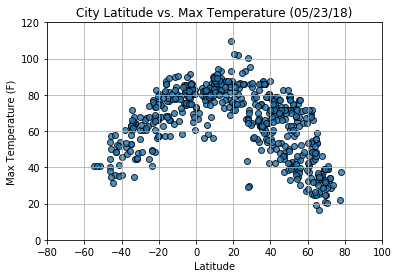

In [16]:
# Build a scatter plot for Latitude vs Temperature
plt.scatter(final_cities_list["Lat"],
            final_cities_list["Max Temp"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (05/23/18)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([0, 120])

# Save the figure
plt.savefig("output_analysis/Latitude_Temperature.png")

# Show plot
plt.show()

## Latitude vs Humidity Plot

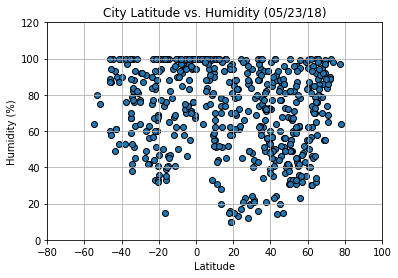

In [17]:
# Build a scatter plot for Latitude vs Humidity
plt.scatter(final_cities_list["Lat"],
            final_cities_list["Humidity"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=1)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (05/23/18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-0, 120])

# Save the figure
plt.savefig("output_analysis/Latitude_Humidity.png")

# Show plot
plt.show()

## Latitude vs Cloudiness Plot

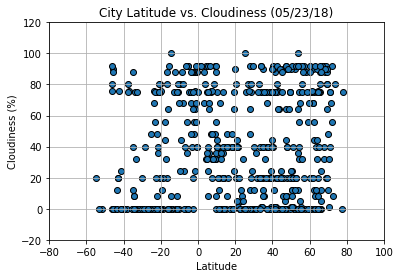

In [18]:
# Build a scatter plot for Latitude vs Cloudiness
plt.scatter(final_cities_list["Lat"],
            final_cities_list["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=1)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (05/23/18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-20, 120])

# Save the figure
plt.savefig("output_analysis/Latitude_Cloudiness.png")

# Show plot
plt.show()

## Latitude vs Wind Speed Plot

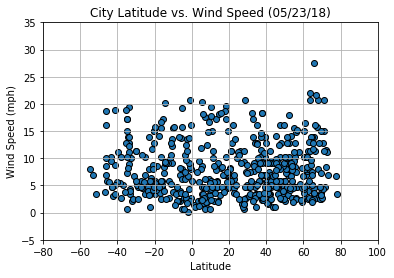

In [19]:
# Build a scatter plot for Latitude vs Wind Speed
plt.scatter(final_cities_list["Lat"],
            final_cities_list["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=1)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (05/23/18)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-5, 35])

# Save the figure
plt.savefig("output_analysis/Latitude_WindSpeed.png")

# Show plot
plt.show()